In [ ]:
!pip install opendatasets

In [ ]:
!pip install kaggle

In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/c/dogs-vs-cats/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: fadyelgawly
Your Kaggle Key: ··········


100%|██████████| 812M/812M [00:04<00:00, 188MB/s]



Extracting archive ./dogs-vs-cats/dogs-vs-cats.zip to ./dogs-vs-cats


In [ ]:
import numpy as np
import keras
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
#import tensorflow as tf
import tensorflow.compat.v1 as tf
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

/usr/local/lib/python3.7/dist-packages/keras/backend.py:414: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [ ]:
!unzip 'dogs-vs-cats/train.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [ ]:
!ls train/cat.0.jpg

train/cat.0.jpg


In [ ]:
!rm -rf 'dogs-vs-cats/train'

In [ ]:
import os, shutil

In [ ]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = 'train'

# The directory where we will
# store our smaller dataset
base_dir = 'cats_and_dogs_small'
try:
  os.mkdir(base_dir)
except:
  pass

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
try:
  os.mkdir(train_dir)
except:
  pass  
validation_dir = os.path.join(base_dir, 'validation')
try:
  os.mkdir(validation_dir)
except:
  pass   
test_dir = os.path.join(base_dir, 'test')
try:
  os.mkdir(test_dir)
except:
  pass   

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
try:
  os.mkdir(train_cats_dir)
except:
  pass   

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
try:
  os.mkdir(train_dogs_dir)
except:
  pass   

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
try:
  os.mkdir(validation_cats_dir)
except:
  pass 

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
try:
  os.mkdir(validation_dogs_dir)
except:
  pass   

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
try:
  os.mkdir(test_cats_dir)
except:
  pass   

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
try:
  os.mkdir(test_dogs_dir)
except:
  pass   

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [ ]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [ ]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [ ]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [ ]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [ ]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
# normalizing inputs before training by rescale
# data generator handles data loading for big data that may inflates my RAM
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    # This is the target directory
    train_dir,
    # All images will be resized to 150x150
    target_size=(150, 150),
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary' , shuffle=True
      )

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
def generator():
    i = 0
    while True:
        i += 1
        yield i
        
for item in generator():
    print(item)
    if item > 4:
        break

1
2
3
4
5


In [ ]:
for data_batch , labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
# normal fit was given images and labels to train upon but here it takes generator and it takes what returns from it which is batch and data
# if we dont add steps per epoch it will loop forever because its like generator you will ever and ever call and will ever and ever return
# so it acts like break
# so you are here telling him get me batches of 20s 100 time so it shuffle within data and get 20s as a minibatch and train them
# so this 100 is coming from data_size / batch_size = 2000/20 = 100
# if i wrote it 110 how will he get those 10 he will return back again and 10 images that was trained upon before

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs=30,
    validation_data=validation_generator, 
    validation_steps=50 
  )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  del sys.path[0]


Epoch 1/30
100/100 [==============================] - 119s 1s/step - loss: 0.6877 - acc: 0.5350 - val_loss: 0.6691 - val_acc: 0.5960
Epoch 2/30
100/100 [==============================] - 121s 1s/step - loss: 0.6513 - acc: 0.6220 - val_loss: 0.6396 - val_acc: 0.6310
Epoch 3/30
100/100 [==============================] - 122s 1s/step - loss: 0.6148 - acc: 0.6620 - val_loss: 0.6603 - val_acc: 0.6090
Epoch 4/30
100/100 [==============================] - 120s 1s/step - loss: 0.5751 - acc: 0.7040 - val_loss: 0.5886 - val_acc: 0.6890
Epoch 5/30
100/100 [==============================] - 120s 1s/step - loss: 0.5347 - acc: 0.7365 - val_loss: 0.5885 - val_acc: 0.6820
Epoch 6/30
100/100 [==============================] - 121s 1s/step - loss: 0.5069 - acc: 0.7475 - val_loss: 0.5789 - val_acc: 0.6910
Epoch 7/30
100/100 [==============================] - 119s 1s/step - loss: 0.4807 - acc: 0.7680 - val_loss: 0.5788 - val_acc: 0.7080
Epoch 8/30
100/100 [==============================] - 120s 1s/step - 

In [ ]:
model.save('gdrive/My Drive/cats_and_dogs_small_1.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls gdrive/"My Drive"/cats_and_dogs_small_1.h5

'gdrive/My Drive/cats_and_dogs_small_1.h5'


In [ ]:
from keras.models import load_model

model = load_model('gdrive/My Drive/cats_and_dogs_small_1.h5')
model.summary()  # As a reminder.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
preds = model.predict_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


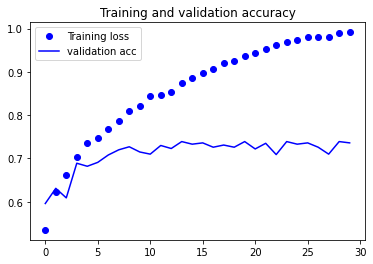

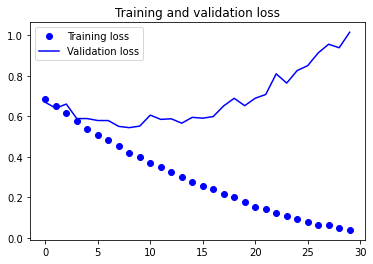

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'Training loss')
plt.plot(epochs, val_acc, 'b', label = 'validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# using data augmentation
datagen = ImageDataGenerator(rescale=1/255,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

In [ ]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

# fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
# img_path = fnames[3]

# Read the image and resize it
# img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
# x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
# x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
# i = 0
# for batch in datagen.flow(x, batch_size=1):
#     plt.figure(i)
#     conv_fm = conv_base.predict(batch[0])
#     imgplot = plt.imshow(image.array_to_img(batch[0]))
#     save(X, y)
#     i += 1
#     if i < 20000 == 0:
#         break

# plt.show()  

In [ ]:
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
print(model.summary())
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 17, 17, 128)     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')



validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
100/100 [==============================] - 131s 1s/step - loss: 0.9796 - acc: 0.5430 - val_loss: 0.8898 - val_acc: 0.5910
Epoch 2/30
100/100 [==============================] - 115s 1s/step - loss: 0.8644 - acc: 0.5625
Epoch 3/30
100/100 [==============================] - 115s 1s/step - loss: 0.8034 - acc: 0.6025
Epoch 4/30
100/100 [==============================] - 115s 1s/step - loss: 0.7759 - acc: 0.6085
Epoch 5/30
100/100 [==============================] - 117s 1s/step - loss: 0.7453 - acc: 0.6270
Epoch 6/30
100/100 [==============================] - 116s 1s/step - loss: 0.7181 - acc: 0.6505
Epoch 7/30
100/100 [==============================] - 116s 1s/step - loss: 0.7064 - acc: 0.6605
Epoch 8/30
100/100 [==============================] - 117s 1s/step - loss: 0.6896 - acc: 0.6505
Epoch 9/30
100/100 [==============================] - 114s 1s/step - loss: 0.6825 - acc: 0.6620
Epoch 10/30
100/100 [==============================] - 116s 1s/step - loss: 0.6667 - acc: 0.6690
Ep

In [ ]:
model.save('gdrive/My Drive/cats_and_dogs_small_2.h5')

In [ ]:
from keras.models import load_model

model = load_model('gdrive/My Drive/cats_and_dogs_small_2.h5')
model.summary()  # As a reminder.

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.legend()

# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()

# plt.show()